In [4]:
import pandas as pd

df = pd.read_csv('data/total.csv')
df['Polygon'] = df['Polygon'].map(eval)

In [30]:
import numpy as np

def area(poly):
    return 0.5 * sum([np.cross(a, b) for a, b in zip(poly, poly[1:] + poly[:1])])
    
# print(area([[np.cos(a), np.sin(a)] for a in np.linspace(0, 2*np.pi, 10000)]))
df['Area'] = df['Polygon'].map(area)

In [48]:
import matplotlib
def show_polygons(ax, polygons, facecolor='white', alpha=1):
    patches = []
    for vertices in polygons:
        polygon = matplotlib.patches.Polygon(
            vertices,
            alpha=alpha, 
            ec='black',
            fc=facecolor,
            lw=1.5)
        patches.append(polygon)

    for patch in patches:
        ax.add_patch(patch)

    ax.autoscale()

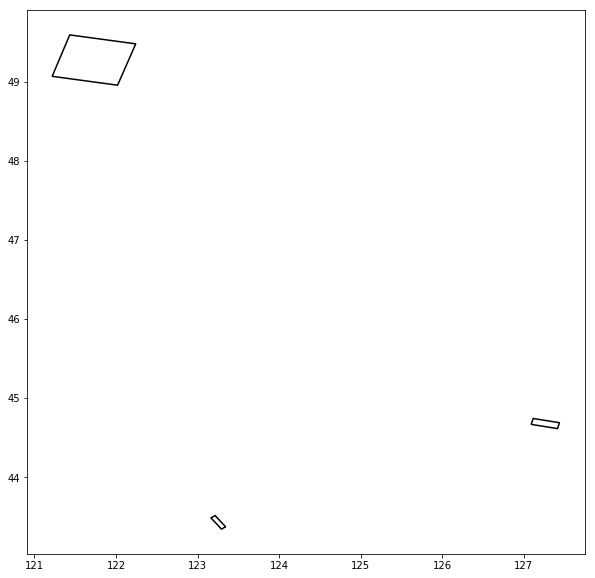

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
df = df.sort_values('Area')

min_area_polygon = df.iloc[0]['Polygon']
mid_area_polygon = df.iloc[len(df)//2]['Polygon']
max_area_polygon = df.iloc[-1]['Polygon']

show_polygons(ax, [min_area_polygon, mid_area_polygon, max_area_polygon], 'white')